In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/content/cardio_train.csv', sep=';')

# Display the first few rows
print(df.head())


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


# **Data** **preprocessing**

In [2]:
#handle missing value
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [3]:
#Feature Engineering
# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Encode gender: 1 (female) and 2 (male) -> 0 and 1
df['gender'] = df['gender'].apply(lambda x: 1 if x == 2 else 0)

# Check the data types and distribution
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     52.840671      0.349571

In [4]:
#Outlier detection and handling
# Removing rows with unrealistic values for blood pressure, height, and weight
df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]
df = df[(df['height'] > 100) & (df['height'] < 250)]
df = df[(df['weight'] > 30) & (df['weight'] < 200)]


In [5]:
#Feature Scaling
# Separate features and target
X = df.drop(['id', 'cardio'], axis=1)
y = df['cardio']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# **Exploratory Data Analysis(EDA) &** **Visualization**

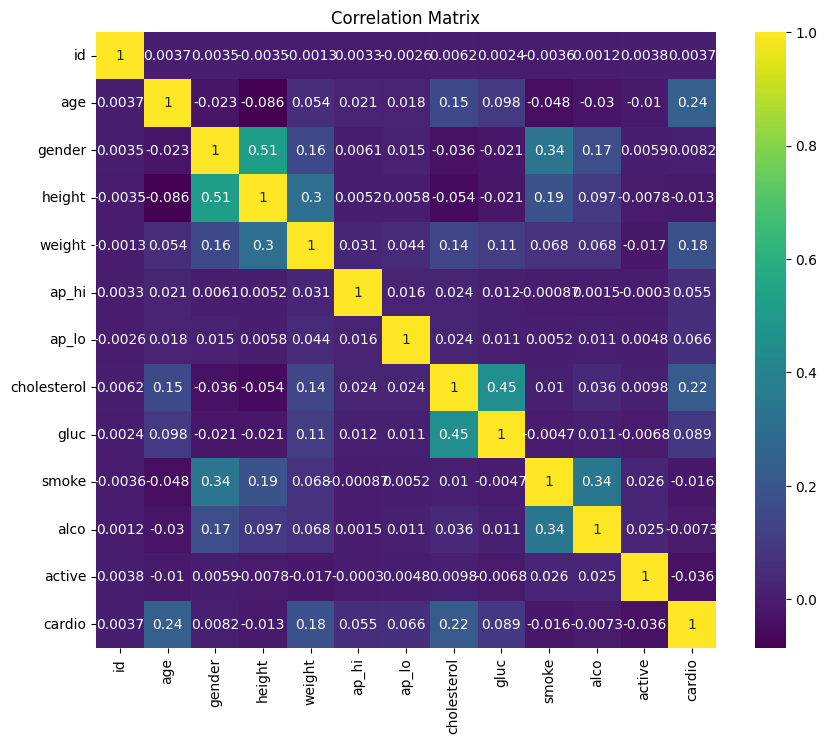

In [6]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


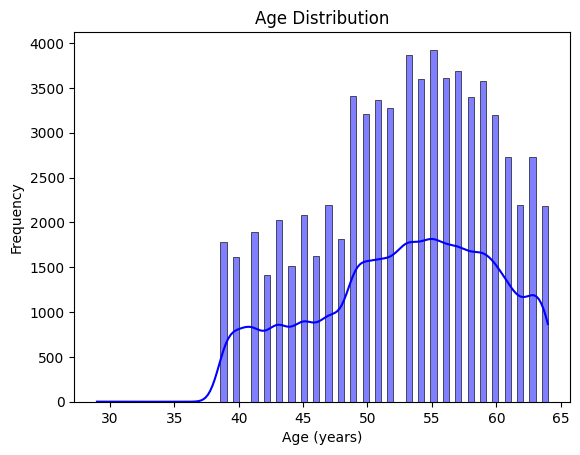

In [7]:
#Age distribuition
sns.histplot(df['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

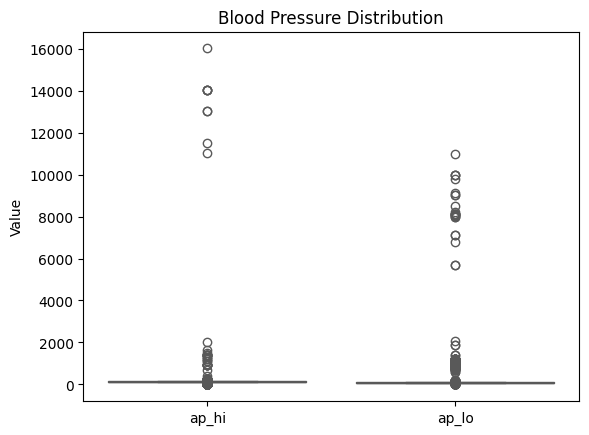

In [8]:
#Blood Pressure Distribuition
sns.boxplot(data=df[['ap_hi', 'ap_lo']], palette='Set2')
plt.title('Blood Pressure Distribution')
plt.ylabel('Value')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


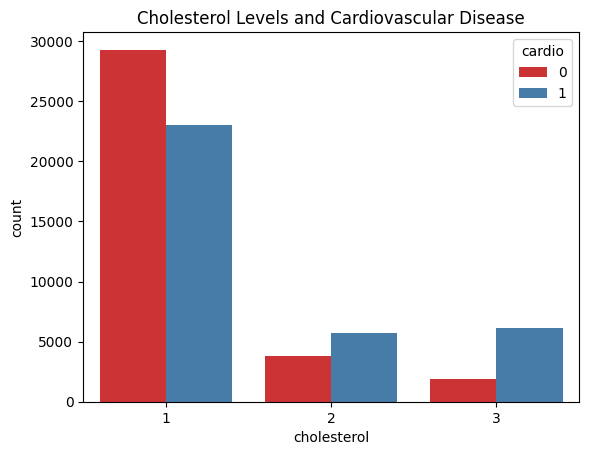

In [9]:
#cholestrol vs cardiovascular Disease
sns.countplot(data=df, x='cholesterol', hue='cardio', palette='Set1')
plt.title('Cholesterol Levels and Cardiovascular Disease')
plt.show()


# **Model Training**

In [10]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}\n")


Logistic Regression Accuracy: 0.72
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73     10387
           1       0.74      0.67      0.71     10591

    accuracy                           0.72     20978
   macro avg       0.72      0.72      0.72     20978
weighted avg       0.72      0.72      0.72     20978

Confusion Matrix for Logistic Regression:
[[7949 2438]
 [3490 7101]]

KNN Accuracy: 0.65
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65     10387
           1       0.66      0.63      0.65     10591

    accuracy                           0.65     20978
   macro avg       0.65      0.65      0.65     20978
weighted avg       0.65      0.65      0.65     20978

Confusion Matrix for KNN:
[[6956 3431]
 [3912 6679]]

SVM Accuracy: 0.73
Classification Report for SVM:
              precision    recall  f1-sc

# **Final Model**

In [11]:
# Train the final model (assuming Random Forest gave the best accuracy)
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)

# Save the model
import joblib
joblib.dump(final_model, 'heart_disease_predictor.pkl')


['heart_disease_predictor.pkl']

In [12]:
# Initialize the Random Forest model
final_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
final_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Model Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70     10387
           1       0.71      0.70      0.71     10591

    accuracy                           0.71     20978
   macro avg       0.71      0.71      0.71     20978
weighted avg       0.71      0.71      0.71     20978

Confusion Matrix:
 [[7350 3037]
 [3147 7444]]


In [14]:
# Save the trained Random Forest model to a file
joblib.dump(final_model, 'heart_disease_predictor.pkl')

# Save the scaler for data preprocessing during inference
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**To use the saved model for making predictions on new patient** **data**

In [15]:
# Load the saved model and scaler
loaded_model = joblib.load('heart_disease_predictor.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example new data point
new_data = [[55, 1, 165, 75, 120, 80, 2, 1, 0, 0, 1]]  # Replace with actual values
new_data_scaled = loaded_scaler.transform(new_data)

# Predict if the patient has cardiovascular disease
prediction = loaded_model.predict(new_data_scaled)
print("Prediction (1 = Has Cardiovascular Disease, 0 = No Cardiovascular Disease):", prediction)


Prediction (1 = Has Cardiovascular Disease, 0 = No Cardiovascular Disease): [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
